# Auto-wah project

In [121]:
# Install libraries
! pip install audiolazy 
! pip install pyaudio
! pip install wave
! pip install scipy

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [115]:
# Imports
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython
import string
import math

# Audio imports
import scipy.signal as sgn
from scipy.io import wavfile
import audiolazy as al
import pyaudio
import wave
import sys

# Helpers
from helpers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import wav file into NumPy array

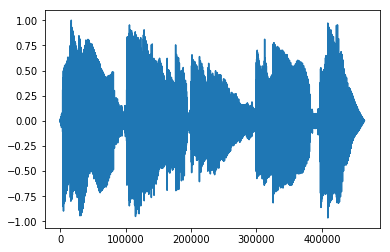

In [149]:
fs, data = wavfile.read('sample.wav') # get data as integers
MAX_VAL = abs(np.iinfo(data.dtype).min) # get max integer
data = data / MAX_VAL # now data is a normalized array of float between -1 and 1

plt.plot(data)

## Compute the envelope of the signal

<function matplotlib.pyplot.show>

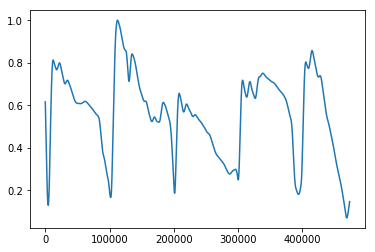

In [148]:
m_hat = abs(sgn.hilbert(data)) # Compute the hilbert transform
envelope = smooth(m_hat, 9000) # Apply a moving average to smooth out the envelope
envelope /= envelope.max() # Normalize between 0 and 1
envelope **= 0.6 # Re-elevate the envelope
plt.plot(envelope)
plt.show

## Moving bandpass filter according to envelope

In [151]:
from audiolazy import sHz, white_noise, line, resonator, AudioIO

s, Hz = sHz(fs)

sig = white_noise() # Endless white noise Stream

dur = 8 * s # Some few seconds of audio
freq = line(dur, 500, 2000) # A lazy iterable range
bw = (freq)/10

filt = resonator(freq * Hz, bw * Hz) # A simple bandpass filter

with AudioIO(True) as player:
  player.play(filt(sig), rate=fs)

bob = filt(sig)

In [132]:
bob